Мы подробно рассмотрим алгоритмы **обучения с учителем** для задачи **классификации**. Такой метод заключается в восстановлении общей закономерности по конечному числу известных примеров.

Центральным понятием машинного обучения считается **обучающая выборка**. Это примеры, на основе которых мы планируем строить общую закономерность. Она обозначается $X$ и состоит из $l$ пар объектов $x_{i}$ и известных ответов $y_{i}$:

$$X = (x^{i}, y_{i})^l_{i=1}$$

\begin{equation*}
X = \left(
\begin{array}{cccc}
x_{11} & x_{12} & \ldots & x_{1m}\\
x_{21} & x_{22} & \ldots & x_{2m}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \ldots & x_{nm}
\end{array}
\right)
\end{equation*}

\begin{equation*}
Y = \left(
\begin{array}{cccc}
y_{1}\\
\vdots\\
y_{n} \end{array}
\right)
\end{equation*}

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, помогающая нам делать предсказания, называется **алгоритмом** или **моделью**. Она принимает на вход объект и выдаёт ответ.

## Оценка качества классификации

Основой проверки является тестовая выборка, в которой проставлено соответствие между документами и их классами. Для того чтобы принимать решение, хуже или лучше справляется с работой новая версия алгоритма, нам необходима численная метрика его качества.

### Меры качества бинарной классификации

В задачах машинного обучения для оценки качества моделей и сравнения  алгоритмов используются различные метрики. Мы рассмотрим некоторые критерии качества в задачах классификации.

#### Матрица ошибок

Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — матрицу ошибок.

Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

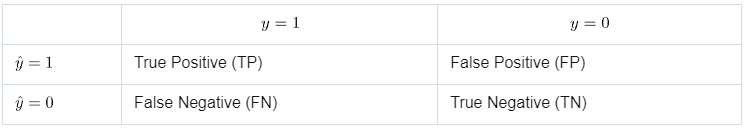

Здесь $\hat y$ — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте.

Два класса делятся на положительный (обычно метка 1) и отрицательный (обычно метка 0 или –1). Объекты, которые алгоритм относит к положительному классу, называются положительными (Positive).Те из них, которые на самом деле принадлежат к этому классу, – истинно положительными (True Positive). Остальные – ложно положительными (False Positive). Аналогичная терминология есть для отрицательного (Negative) класса.

Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

Возьмём задачу выявления подозрения на определенное заболевание. Если у пациента оно есть, то это будет положительным классом (positive). Если нет – отрицательным (negative). Результатом работы модели может быть определение – следует ли «заподозрить» у пациента какой-то определенный диагноз (тогда результат = true) или нет (тогда результат = false).

Пусть какой-то набор медицинских данных характерен для данного диагноза. Если наша модель верно определила и поставила положительный класс, тогда это истинно положительный исход (true positive). Если же модель ставит отрицательную метку класса, тогда это ложно отрицательный исход (false negative). 

В случае отсутствия диагноза у рассматриваемого набора данных исходы модели остаются аналогичными. Тогда если модель относит запись к классу положительную, то мы говорим о ложно положительном исходе (false positive): модель «сказала» что диагноз есть, но на самом деле его нет. Наоборот, если модель определят запись как отрицательный класс, то это — истинно отрицательный исход (true negative).

#### Accuracy

Accuracy — доля правильных ответов алгоритма:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Эта метрика непоказательна в задачах с неравными классами. 

Допустим, мы хотим оценить работу спам-фильтра почты. 

📌 У нас есть 100 не-спам писем (отрицательный класс). 90 из них классификатор определил верно, остальные 10 – неверно.

In [1]:
TN = 90 # Место для вашего ответа
FP = 10 # Место для вашего ответа

📌 Также есть 10 спам-писем (положительный класс). 6 из них классификатор определил верно, остальные 4 – неверно.

In [2]:
TP = 6 # Место для вашего ответа
FN = 4 # Место для вашего ответа

📌 Посчитаем accuracy:

In [3]:
accuracy = (TP + TN) / (TP + TN + FP + FN) # Место для вашего кода
accuracy

0.8727272727272727

📌 Что будет, если мы просто будем предсказывать все письма как не-спам?

In [4]:
TN = 100 # Место для вашего ответа
FP = 0 # Место для вашего ответа
TP = 0 # Место для вашего ответа
FN = 10 # Место для вашего ответа
accuracy = (TP + TN) / (TP + TN + FP + FN) # Место для вашего кода
accuracy

0.9090909090909091

При этом, наша модель совершенно не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

#### Точность, полнота, F-мера

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики точность (precision) и полнота (recall).

Точность можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными.

$$Precision = \frac{TP}{TP + FP}$$

Полнота показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

$$Recall = \frac{TP}{TP + FN}$$

Полнота демонстрирует способность алгоритма обнаруживать данный класс вообще, а точность — способность отличать этот класс от других классов. Точность и полнота, в отличие от accuracy, не зависят от соотношения классов и потому применимы в условиях несбалансированных выборок.

F-мера (F score) является средним гармоническим точности и полноты:

$$F=2\frac{Precision×Recall}{Precision+Recall}$$
​


Данная формула придает одинаковый вес точности и полноте, поэтому F-мера будет падать одинаково при уменьшении и точности и полноты. Возможно рассчитать F-меру придав различный вес точности и полноте, если вы осознанно отдаете приоритет одной из этих метрик при разработке алгоритма.

$$F=(β^2+1)\frac{Precision×Recall}{β^2Precision+Recall}$$
​

$β$ принимает значения в диапазоне, $0<β<1$ если вы хотите отдать приоритет точности, а при $β>1$ приоритет отдается полноте. При $β=1$ формула сводится к предыдущей, и вы получаете сбалансированную F-меру (также ее называют F1).



#### AUC-ROC

При конвертации вещественного ответа алгоритма (как правило, вероятности принадлежности к классу) в бинарную метку, мы должны выбрать какой-либо порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при вышеупомянутом отсутствии баланса классов.


Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR):

$$TPR = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{FP + TN}$$

TPR нам уже известна, это полнота. FPR показывает, какую долю из объектов отрицательного класса алгоритм предсказал неверно. Для объединения FPR и TPR в одну метрику, необходимо вычислить эти метрики, а затем построить их на одном графике с осями FPR и TPR. Результирующая кривая представляет собой кривую ROC, а площадь под кривой является метрикой AUC-ROC. 

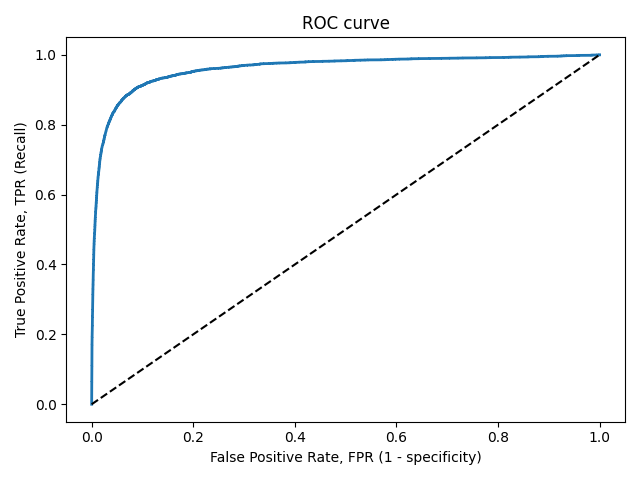

В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

### Меры качества многоклассовой класификации

В многоклассовых задачах, как правило, стараются свести подсчет качества к вычислению одной из рассмотренных выше двухклассовых метрик. 

Пусть выборка состоит из  $K$  классов. Задача классификации ставится как $K$  задач об отделении класса  $i$  от остальных $(i=1,...,K)$. Для каждой из них можно посчитать свою матрицу ошибок.

Выделяют два подхода:

1. Микроусреднение

Сначала элементы матрицы ошибок усредняются по всем классам. Например $TP = \frac{1}{K}\sum_{i=1}^KTP_i$. Затем по одной усреднённой матрице ошибок считаем точность, полноту, F-меру.

 $$Micro-precision = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFP_i}$$

 $$Micro-recall = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFN_i}$$

2. Макрусреднение

Сначала вычисляется итоговая метрика для каждого класса, а затем результаты усредняются по всем классам.

$$Macro-precision = \frac{\sum_{i=1}^KPrecision_i}{K}$$

$$Macro-recall = \frac{\sum_{i=1}^KRecall_i}{K}$$

## Наивный байесовский классификатор

Наивный байесовский классификатор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В теореме Байеса используются априорная и апостериорная вероятности.  

Априорная (безусловная) вероятность - это вероятность, присвоенная событию при отсутствии знания, поддерживающего его наступление.

Апостериорная (условная) вероятность - это вероятность события при некотором условии, рассматриваемая в противоположность его априорной вероятности.



Теорема Байеса позволяет рассчитать апостериорную вероятность $P(A | B)$ на основе $P(A)$, $P(B)$ и $P(B | A)$. 

$$P (A | B) = \frac{P (B | A) × P(A)}{P(B)}$$

$A$ - рассматриваемое событие, $B$ - гипотеза, входящая в некую полную группу событий

$P(A | B)$ – апостериорная вероятность ($A$ при условии $B$ истинно)

$P(A$) – априорная вероятность (независимая вероятность $A$)

$P(B | A)$ – вероятность данного значения признака при данном классе ($B$ при условии $A$ истинно)

$P(B)$ – априорная вероятность при значении нашего признака (независимая вероятность $B$)

### Классификация спама

Мы будем использовать наивный байесовский классификатор для фильтрации спама.  В данной задаче предложения разделены на два класса: сообщения, являющиеся спамом (spam), и сообщения, не являющиеся спамом (ham).

$$P(S|W) = \frac{P(W |S) × P(S)} {P(W)} = \frac{P(W |S) × P(S)} {P(W |S) × P(S) + P(W | H) × P(H)} $$

$P(S|W)$ — вероятность, что сообщение окажется спамом $S$ при появлении слова $W$;

$P(W |S)$ — вероятность, что слово $W$ встречается в сообщении, учитывая, что оно является спамом $S$;

$P(S)$ — вероятность, что письмо является спамом $S$;

$P(W)$ — вероятность слова $W$;

$P(W |H )$ — вероятность, что слово $W$ встречается в сообщении, учитывая, что оно не является спамом $H$;

$P(H)$ — вероятность, что сообщение не является спамом $H$.

Вероятность определена в диапазоне от 0 до 1. Вероятности $P(S|W)$ для каждого слова в сообщении перемножаются, чтобы получить общую вероятность, что сообщение является спамом. Если общая вероятность больше 0.5, сообщение будет считаться спамом.

Вначале реализуем алгоритм самостоятельно и применим его к сконструированным примерам. Затем используем готовую реализацию библиотеки `scikit-learn` и применим ее к реальным данным.

#### Самостоятельная реализация

In [5]:
import math

Запишем примеры предложений в обучающую выборку.

In [6]:
train_spam = ['you won special reward', 'special prize for you', 'guaranteed prize', 'you receive bonus reward', 'select your prize']
train_ham = ['the importance of reward', 'review your physical activity', 'our activity report','benefits of physical activity', 'guaranteed activity', 'select your activity']

Токениизруем предложения и составим словарь уникальных слов для каждого класса.

In [7]:
def make_vocabulary(data):
  data_split = []
  vocabulary = set()
  for sentence in data:
    sentence = sentence.split()
    data_split.append(sentence)
    for word in sentence:
      vocabulary.add(word)
  return data_split, vocabulary

In [8]:
train_spam_split, spam_vocabulary = make_vocabulary(train_spam)
train_ham_split, ham_vocabulary = make_vocabulary(train_ham)

In [9]:
train_spam_split, spam_vocabulary

([['you', 'won', 'special', 'reward'],
  ['special', 'prize', 'for', 'you'],
  ['guaranteed', 'prize'],
  ['you', 'receive', 'bonus', 'reward'],
  ['select', 'your', 'prize']],
 {'bonus',
  'for',
  'guaranteed',
  'prize',
  'receive',
  'reward',
  'select',
  'special',
  'won',
  'you',
  'your'})

Вычислим вероятность, что слово встречается в сообщении, учитывая класс сообщения (`probability_word_in_class`):

$P(W |S)$ — вероятность, что слово $W$ встречается в сообщении, учитывая, что оно является спамом $S$, 

$P(W | H)$ — вероятность, что слово $W$ встречается в сообщении, учитывая, что оно не является спамом $H$. 

📌 Поделим количество сообщений, содержащих слово $W$ (`count_value`), и разделим на общее количество сообщений (`total_sentences`). 


Применим сглаживание. К количеству вхождений слова  $W$ (`count_value`) прибавим 1, чтобы избежать нулевых значений. К количеству сообщений(`total_sentences`) прибавим 2, чтобы учесть количество имеющихся классов.

Полученные вероятности запишем в словарь (`count_dict`).

In [10]:
def probability_word_in_class(data_split, vocabulary):
  count_dict = {}
  for word in vocabulary:
    count_value = 0
    for sentence in data_split:
      if word in sentence:
          count_value += 1
    total_sentences = len(data_split) # Место для вашего кода
    probability_word_in_class = (count_value + 1) / (total_sentences + 2) # Место для вашего кода
    count_dict[word] = probability_word_in_class # Место для вашего кода
  return count_dict

In [11]:
dict_spamicity = probability_word_in_class(train_spam_split, spam_vocabulary)
for key, value in dict_spamicity.items():
  print(f"P({key}|S)={value}")

P(receive|S)=0.2857142857142857
P(for|S)=0.2857142857142857
P(you|S)=0.5714285714285714
P(reward|S)=0.42857142857142855
P(your|S)=0.2857142857142857
P(bonus|S)=0.2857142857142857
P(prize|S)=0.5714285714285714
P(special|S)=0.42857142857142855
P(won|S)=0.2857142857142857
P(guaranteed|S)=0.2857142857142857
P(select|S)=0.2857142857142857


In [12]:
dict_hamicity = probability_word_in_class(train_ham_split, ham_vocabulary)
for key, value in dict_hamicity.items():
  print(f"P({key}|H)={value}")

P(report|H)=0.25
P(physical|H)=0.375
P(your|H)=0.375
P(reward|H)=0.25
P(our|H)=0.25
P(the|H)=0.25
P(activity|H)=0.75
P(benefits|H)=0.25
P(review|H)=0.25
P(importance|H)=0.25
P(guaranteed|H)=0.25
P(of|H)=0.375
P(select|H)=0.25


📌 Посчитаем вероятность каждого класса. 

$P(S)$ — вероятность, что сообщение является спамом $S$ (`spam_probability`);

$P(H)$ — вероятность, что сообщение не является спамом $H$ (`ham_probability`).

Для этого поделим количество предложений в классе на общее количество предложений (`total_len`).

In [13]:
total_len = len(train_spam) + len(train_ham)
spam_probability = len(train_spam) / total_len # Место для вашего кода
print(f"P(S)={spam_probability}")
ham_probability = len(train_ham) / total_len # Место для вашего кода
print(f"P(H)={ham_probability}")

P(S)=0.45454545454545453
P(H)=0.5454545454545454


Посчитаем вероятность $P(S|W)$, что сообщение окажется спамом $S$ при появлении слова $W$ (`probability_spam_with_word`). 

Вначале вычислим вероятности $P(W|S)$ и $P(W|H$). Если слово встречалось в сообщении, которое является спамом, то вероятность уже посчитана (значение по ключу `word` в словаре `dict_spamicity`). Если нет, то считаем вероятность как `1/(количество сообщений спама + 2)`. Аналогично для сообщений, которые не являются спамом. 

Верояности класса спама $P(S)$ (`spam_probability`) и класса не-спама $P(H)$ (`ham_probability`) уже посчитаны и передаются в функцию.

📌 Вычислим итоговую вероятность для слова (`bayes_probability`) по формуле $P(S|W) = \frac{P(W |S) × P(S)} {P(W |S) × P(S) + P(W | H) × P(H)} $.

Вероятности для каждого слова добавим в массив (`probs`) и перемножим (`final_classification`).

In [14]:
def probability_spam_with_word(sentence, dict_spamicity, dict_hamicity, spam_data, ham_data, spam_probability, ham_probability):
  probs = []
  for word in sentence.split():
    try:
      probability_word_in_spam = dict_spamicity[word]
    except KeyError:
      probability_word_in_spam = 1 / (len(spam_data) + 2)
    try:
      probability_word_in_ham = dict_hamicity[word]
    except KeyError:
      probability_word_in_ham = 1 / (len(ham_data) + 2)  
    bayes_probability = (probability_word_in_spam * spam_probability) / ((probability_word_in_spam * spam_probability) + (probability_word_in_ham * ham_probability)) # Место для вашего кода
    probs.append(bayes_probability)
  final_classification = math.prod(probs)
  if final_classification >= 0.5:
    spam = True
  else:
    spam = False
  return final_classification, spam

In [15]:
test = {'spam':'bonus prize', 'ham':'the importance of physical activity'}
for key, value in test.items():
  probability, spam = probability_spam_with_word(value, dict_spamicity, dict_hamicity, train_spam, train_ham, spam_probability, ham_probability)
  print(f'P({value}|S)={probability}')
  if spam:
    print(f'Письмо является спамом')
  else:
    print(f'Письмо не является спамом')

P(bonus prize|S)=0.5193962019152735
Письмо является спамом
P(the importance of physical activity|S)=0.0008276706572731537
Письмо не является спамом


#### Реализация с помощью MultinomialNB

In [16]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[Используемый датасет](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) — набор смс-сообщений на английском языке, размеченных как "спам" (spam) и "не спам" (ham). 

In [17]:
!wget https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/01_machine_learning/SMSSpamCollection

--2023-03-03 12:13:06--  https://raw.githubusercontent.com/Xeanst/NN_in_compling/main/01_machine_learning/SMSSpamCollection
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘SMSSpamCollection’

SMSSpamCollection   100%[===================>] 466.71K  --.-KB/s    in 0.03s   

2023-03-03 12:13:07 (18.0 MB/s) - ‘SMSSpamCollection’ saved [477907/477907]



In [18]:
sms_spam = pd.read_csv('SMSSpamCollection', sep='\t', # метки классов отделены от сообщений табуляцией
                       header=None, names=['Label', 'SMS']) # заголовка нет, даем названия столбцам
print(sms_spam.shape)
sms_spam.head()

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Посмотрим, какое количество сообщений каждого класса представлено в датасете.

In [19]:
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

Запишем в отдельные файлы тексты сообщений и их метки.

In [20]:
X = sms_spam['SMS']
y = sms_spam['Label']

In [21]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5572, dtype: object

In [22]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

Разделим данные на обучающую и тестовую выборки.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(4179,) (1393,)
(4179,) (1393,)


Осуществим предобработку текста. Приведем к нижнему регистру (`.lower()`), уберем знаки препинания (`re.sub`), разделим по пробелам (`.split()`), удалим стоп-слова (`STOPWORDS`). Получившийся массив слов запишем в строку через пробел (`.join()`).

In [24]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text =  ' '.join([w for w in text.split() if not w in STOPWORDS])
    return text

In [25]:
X_train = [text_prepare(x) for x in X_train]
X_test = [text_prepare(x) for x in X_test]
X_train[0], X_test[0]

('winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hours',
 'squeeeeeze christmas hug u lik frndshp den hug back u get 3 u r cute 6 u r luvd 9 u r lucky none people hate u')

Для классификации необходимо представить каждое предложение в виде набора признаков — вектора. Будем использовать модель векторизации "мешок слов". Метод `fit()` собирает словарь и статистики по текстам. Метод `transform()` преобразует тексты в векторы на основе уже собранного словаря. Метод `fit_transform`  делает сразу и первое, и второе.

📌 В каком порядке нужно использовать методы? Можно ли применить одинаковый метод к обучающей и тестовой выборке?

In [26]:
vect = CountVectorizer()
# Место для вашего кода
#vect.fit(X_train)
#X_train_bow = vect.transform(X_train)
X_train_bow = vect.fit_transform(X_train)
X_test_bow = vect.transform(X_test)  

In [27]:
X_train_bow

<4179x7884 sparse matrix of type '<class 'numpy.int64'>'
	with 36266 stored elements in Compressed Sparse Row format>

In [28]:
X_test_bow

<1393x7884 sparse matrix of type '<class 'numpy.int64'>'
	with 10320 stored elements in Compressed Sparse Row format>

Разрежённая (sparse) матрица — матрица с преимущественно нулевыми элементами. 

**Координаты ненулевых значений в каждой строке и каждом столбце**

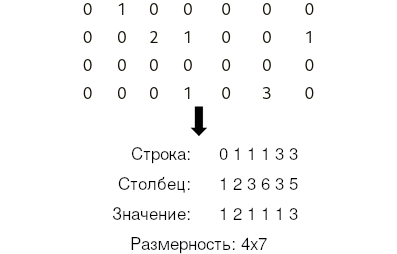

**Количество ненулевых значений на каждой строке**

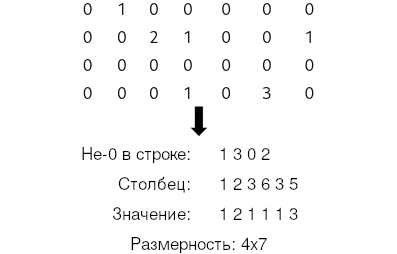

**Сжатое хранение строкой**

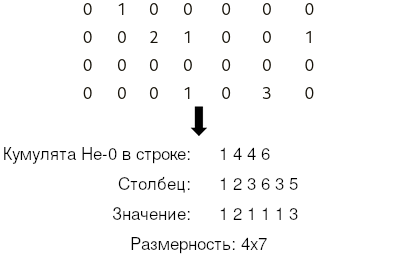

Создадим модель для классификации — наивный байесовский классификатор. Осуществим обучение модели на тренировочной выборке из предложений (`X_train_bow`) и меток (`y_train`) с помощью метода `fit`. Затем используем обученную модель для предсказания меток на основе предложений тестовой выборки (`X_test_bow`) с помощью метода `predict`.

In [29]:
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
y_pred_class = nb.predict(X_test_bow)
y_pred_class

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

Посчитаем качество классификации (accuracy). Поскольку классы не сбалансированы, посчитаем также точность (precision), полноту (recall) и F-меру (f1) для каждого класса.

In [30]:
accuracy_score(y_test, y_pred_class)

0.9863603732950467

Точность, полнота и F-мера для класса спама.

In [31]:
precision_score(y_test, y_pred_class, pos_label='spam')

0.9562841530054644

In [32]:
recall_score(y_test, y_pred_class, pos_label='spam')

0.9408602150537635

In [33]:
f1_score(y_test, y_pred_class, pos_label='spam')

0.9485094850948509

## Логистическая регрессия

Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков. Для этого вводится зависимая переменная $y$, принимающая значения $0$ и $1$, и множество независимых переменных $x_1,...x_n$, на основе значений которых требуется вычислить вероятность принятия того или иного значения зависимой переменной.
 
В логистической регрессии значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу. Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области. 

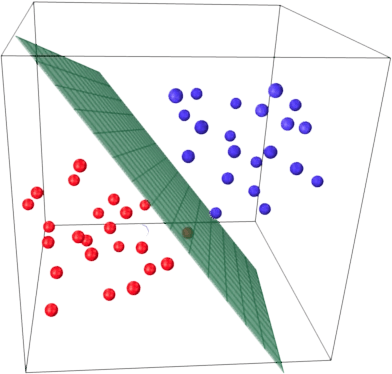

### Генерация данных

In [34]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

Будем использовать случайно сгенерированные данные в качестве примера для понимания логистической регрессии. 

$X$ — входные данные, матрица размером $m × n$;

$m$ — количество объектов, строки матрицы;

$n$ — количество признаков, столбцы матрицы;

$y$ — известные ответы, вектор длины $m$.

Данные разделены на два класса — класс 0 и класс 1. Изобразим их на графике.

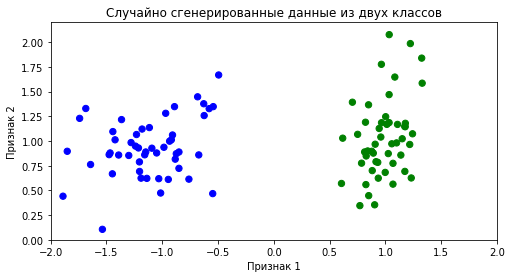

In [35]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1,
                           n_clusters_per_class=1)
colors = ListedColormap(['green', 'blue'])
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=40, cmap=colors)
plt.xlim([-2, 2])
plt.ylim([0, 2.2])
plt.title('Случайно сгенерированные данные из двух классов')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [36]:
np.shape(X), X[:5]

((100, 2), array([[-1.04948638,  0.8786438 ],
        [ 0.8780991 ,  0.89551051],
        [ 0.95928819,  1.03967316],
        [-1.18013412,  1.12062155],
        [-0.90731836,  1.06040861]]))

In [37]:
np.shape(y), y[:5]

((100,), array([1, 0, 0, 1, 1]))

### Функция активации

Признаки могут по-разному влиять на отнесение объекта к его классу. При осуществлении машинного обучения для каждого признака необходимо определенный **коэффициент значимости** или **вес**, обозначаемый $w_i$. 

Необходимо перемножить признаки и веса, а затем сложить полученные значения. Если количество признаков — $n$, то получим следующее выражение:

 $$z = w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n} + b$$

Оптимизация модели машинного обучения в таком случае заключается в подборе оптимальных значений параметров. Параметр $b$ называется **свободным коэффициентом** или **сдвигом**. Сумму в формуле также можно описать как скалярное произведение вектора признаков $x=(x_{1},...,x_{n})$ на вектор весов $w=(w_{1},...,w_{n})$:

$$z(x) = \left \langle w,x \right \rangle + b$$

Мы хотим получить вероятность принадлежности к классу $1$, которая принимает значения в диапазоне от $0$ до $1$. Чтобы осуществить предсказание ответов для объектов, необходимо использовать **функцию активации**. Она определяет выходное значение алгоритма в зависимости от того, что мы подали на вход. Для логистической регрессии это функция сигмоиды, которая сжимает выходные данные между 0 и 1.
$$ σ(z(x))=\frac{1}{1+e^{-z(x)}} = \frac{1}{1+e^{-(\left \langle w,x \right \rangle + b)}}$$

📌 Напишите функцию сигмоиды, учитывая, что для функции экспоненты $e^{x}$ используется метод `np.exp(x)`.

In [38]:
def sigmoid(z):
    return 1/(1 + np.exp(-z)) # Место для вашего кода

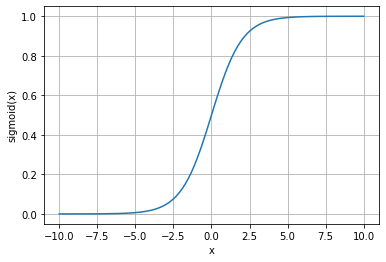

In [39]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.plot(dots, sigmoid_value)
plt.show()

По мере увеличения $z(x)$ значение $σ(z(x))$ становится ближе к 1, а по мере уменьшения $z(x)$ — ближе к 0.

### Функция потерь

Предсказанные значения $y_{pred}$ между $0$ и $1$ представляют собой вероятность того, что $y=1$: $$P(y = 1 | X; w, b) = y_{pred}$$ 

Тогда вероятность того, что $y=0$, будет равна $(1-y_{pred})$: $$P(y = 0 | X; w, b) = (1-y_{pred})$$





Нам необходимо определить оптимальные параметры (веса $w$ и сдвиг $b$), которые помогут делать наилучшие прогнозы.

Введем понятие **функции потерь**. Она показывает стоимость ошибки, сравнивая корректные ответы и ответы, предсказанные алгоритмом на основе конкретных параметров. Поскольку ошибка должна быть минимальной, необходимо минимизировать функцию потерь.

Ниже приведена функция кросс-энтропии или логарифмическая функция потерь:

$$L_{CE}(y_{pred},y) = -\frac{1}{m}\sum^{m}_{i=1}[y^ilog(y_{pred}^i)+(1-y^i)log(1-y^i_{pred})]$$

📌 Напишите функцию кросс-энтропии, учитывая, что для подсчета среднего используется метод `np.mean`, а для подсчета логарифма — `np.log`.

In [40]:
def loss(y, y_pred):
    return -np.mean(y*(np.log(y_pred)) + (1-y)*np.log(1-y_pred)) # Место для вашего кода

### Градиентный спуск

Для обновления и оптимизации парамеров модели нужно рассчитать градиенты функции и применить **метод градиентного спуска**. Градиентный спуск — это способ поиска точек минимума или максимума в сложных функциях.

Как найти минимум функции в простом случае?



> Найти производную функции и приравнять ее к нулю;

> Решить получившееся уравнение, то есть найти, при каких значениях переменной производная равна нулю;

> Подставить эти значения в функцию и проверить, где получится минимальное значение.

Производная функции выражает скорость ее возрастания или убывания. Её геометрический смысл — показать угол, под которым в данной точке проходит касательная к функции. Если производную (угол касательной) приравнять к нулю, то мы найдем точки, в которых касательная параллельна оси абсцисс. В этих точках функция меняет направление, они обязательно становятся (хотя бы локальными) минимумами или максимумами функции.

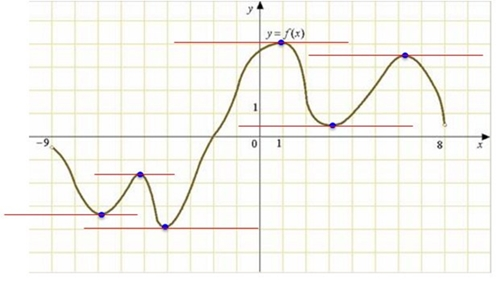

В случае машинного обучения такой вариант не сработает. Поскольку наша функция потерь зависит от нескольких переменных, можно говорить о частной производной, когда все остальные переменные, кроме интересующей нас, становятся константами (постоянными). Производная функции $f$ от переменной $x$: $\large\frac{\partial f}{\partial x}$.

Градиентом функции $f$ называется $d$-мерный вектор из частных производных. 

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

Градиент задает направление наискорейшего роста функции. Значит, антиградиент будет показывать направление ее скорейшего убывания, что полезно в задаче минимизации ошибки.

Градиентный спуск — это алгоритм, который выбирает случайную точку, рассчитывает направление скорейшего убывания функции (пользуясь градиентом функции в данной точке), а затем пошагово рассчитывает новые значения функции, двигаясь в выбранную сторону. Если убывание значения функции становится слишком медленным, алгоритм останавливается и говорит, что нашел минимум.

Размер шага алгоритма определяет, насколько мы собираемся двигать точку на функции потерь, и этот параметр называется **скоростью обучения** $η$.

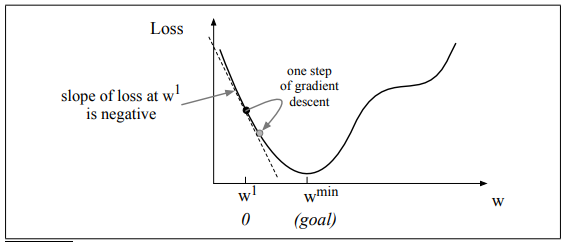


Частная производная функции потерь от переменной $w$ — усредненная разность между предсказанным ответом $y_{pred}$ и истинным ответом $y$, умноженная на транспонированную матрицу входных значений $X^T$:

$$\frac{\partial L_{CE}(y_{pred},y)}{\partial w} = \frac{1}{m}(y_{pred} - y)X^T$$

Частная производная функции потерь от переменной $b$ — усредненная разность между предсказанным ответом $y_{pred}$ и истинным ответом $y$:

$$\frac{\partial L_{CE}(y_{pred},y)}{\partial b}  = \frac{1}{m}(y_{pred} - y)$$

Окончательные значения из расчета производной используются для вычисления и обновления параметров $w$ и $b$:

$$w = w-η\frac{\partial L_{CE}(y_{pred},y)}{\partial w}$$

$$b = b-η\frac{\partial L_{CE}(y_{pred},y)}{\partial b}$$

Транспонированная матрица — матрица $A^T$, полученная из исходной матрицы $A$ заменой строк на столбцы.

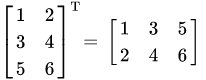

In [41]:
def gradients(X, y, y_pred):
    
    m = X.shape[0]
    
    gradients_w = (1/m)*np.dot(X.T, (y_pred - y))
    gradient_b = (1/m)*np.sum(y_pred - y)

    return gradients_w, gradient_b

### Обучение модели

In [42]:
def plot_decision_boundary(X, w, b):
    
    # граница решений задается функцией y=ax+c
    # ax+c = w.X + b
    x1 = [min(X[:,0]), max(X[:,0])]
    a = -w[0]/w[1]
    c = -b/w[1]
    x2 = a*x1 + c

    fig = plt.figure(figsize=(8,4))
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=40, cmap=colors)
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.title('Граница решений')
    plt.plot(x1, x2, 'y-')

In [43]:
def train(x, y, bs, epochs, lr):
    
    # X - входные объекты
    # y - ответы
    # bs - размер батча
    # epochs - количество эпох
    # lr - скорость обучения  
    # m - количество объектов
    # n - количество признаков
    m, n = x.shape
    
    # вначале все параметры равны нулю
    w = np.zeros((n,1))
    b = 0
    
    y = y.reshape(m,1)
    
    # создаем список, чтобы хранить значения функции потерь
    losses = []
    
    # цикл для обучения
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # задаем батчи
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # вычисляем ответы
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # вычисляем градиент
            dw, db = gradients(xb, yb, y_hat)
            
            # обновляем параметры
            w -= lr*dw
            b -= lr*db
        
        # вычисляем значение функции потерь и добавляем его в список
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # возвращаем параметры (веса, сдвиг) и значения функции потерь
    return w, b, losses

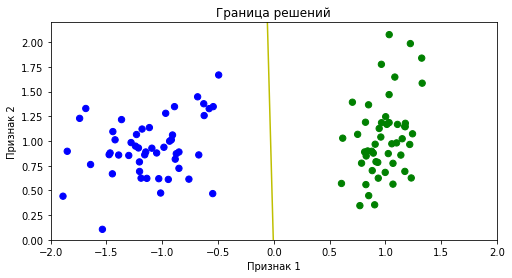

In [44]:
# обучение 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)
# граница решений
plot_decision_boundary(X, w, b)